11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9089 - loss: 0.3027 - val_accuracy: 0.9816 - val_loss: 0.0569
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9845 - loss: 0.0535 - val_accuracy: 0.9851 - val_loss: 0.0468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9856 - val_loss: 0.0425
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9931 - loss: 0.0211 - val_accuracy: 0.9875 - val_loss: 0.0412
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9855 - val_loss: 0.0490
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9819 - loss: 0.0631
Test Accuracy: 0.9855
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


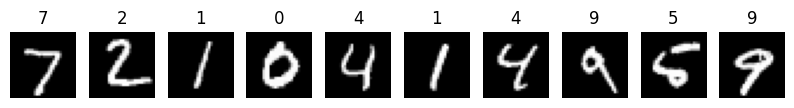

In [1]:
# Handwritten Digit Recognition using CNN (MNIST Dataset)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Visualize predictions
import numpy as np
predictions = model.predict(x_test)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(np.argmax(predictions[i]))
plt.show()


In [2]:
!pip install tensorflow tensorflow-datasets


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load EMNIST Balanced dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Get number of classes (should be 47 for balanced set)
num_classes = ds_info.features['label'].num_classes

# Normalize and batch data
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, -1)  # Add channel dimension
    return image, label

batch_size = 128
ds_train = ds_train.map(preprocess).shuffle(1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(ds_train, epochs=5, validation_data=ds_test)

# Evaluate
loss, acc = model.evaluate(ds_test)
print(f"Test Accuracy: {acc:.4f}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.DE3SUR_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.DE3SUR_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


882/882 ━━━━━━━━━━━━━━━━━━━━ 104s 115ms/step - accuracy: 0.6212 - loss: 1.3571 - val_accuracy: 0.8318 - val_loss: 0.5213
Epoch 2/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - accuracy: 0.8414 - loss: 0.4740 - val_accuracy: 0.8522 - val_loss: 0.4466
Epoch 3/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 88s 99ms/step - accuracy: 0.8632 - loss: 0.3987 - val_accuracy: 0.8612 - val_loss: 0.4132
Epoch 4/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 143s 100ms/step - accuracy: 0.8731 - loss: 0.3570 - val_accuracy: 0.8606 - val_loss: 0.4088
Epoch 5/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 141s 99ms/step - accuracy: 0.8836 - loss: 0.3275 - val_accuracy: 0.8625 - val_loss: 0.3947
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8657 - loss: 0.3861
Test Accuracy: 0.8625


In [4]:
# Character mapping from EMNIST documentation
emnist_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',
    'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'
]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


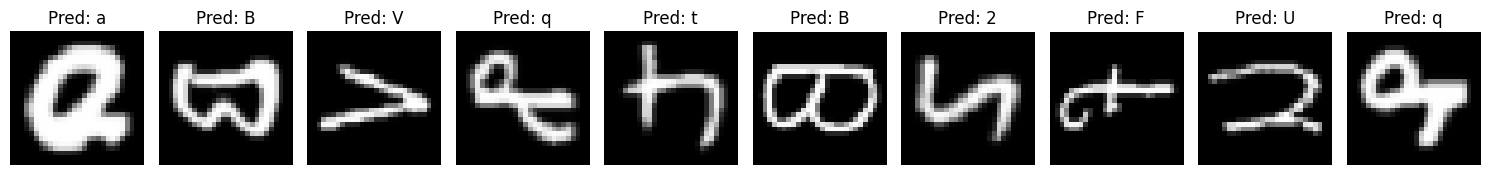

In [5]:
# Take one batch from the test set
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 4))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"Pred: {emnist_labels[pred_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
